# Visualizing Model Performance: The Confusion Matrix 📊

While metrics like accuracy, precision, and recall are powerful, they are all derived from a single, fundamental tool: the **Confusion Matrix**. A confusion matrix is a table that summarizes the performance of a classification model by showing the counts of true and false predictions for each class.

It's called a "confusion matrix" because it reveals where the model is getting "confused" when it makes predictions. It provides a much more detailed breakdown of performance than a single accuracy score, showing exactly where the errors are occurring.

---


## 1. Understanding the Four Quadrants

For a binary classification problem (like predicting 0 or 1), the confusion matrix is a 2x2 table.


The four quadrants are:
* **True Negative (TN) - Top Left:** The model correctly predicted the negative class (e.g., predicted `0`, and the actual value was `0`).
* **False Positive (FP) - Top Right:** The model incorrectly predicted the positive class (a "Type I Error"). (e.g., predicted `1`, but the actual value was `0`).
* **False Negative (FN) - Bottom Left:** The model incorrectly predicted the negative class (a "Type II Error"). (e.g., predicted `0`, but the actual value was `1`).
* **True Positive (TP) - Bottom Right:** The model correctly predicted the positive class. (e.g., predicted `1`, and the actual value was `1`).


## 2. A Practical Example: Predicting Car Ownership

Let's build a model to predict car ownership and then generate a confusion matrix to evaluate it.

### Step 2.1: Data Loading and Model Training

First, we load the `car_ownership.csv` dataset, split it, and train a Logistic Regression model.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from matplotlib import pyplot as plt

df = pd.read_csv("car_ownership.csv")
df.head(3)

,monthly_salary,owns_car
0,22000,0
1,25000,0
2,47000,1


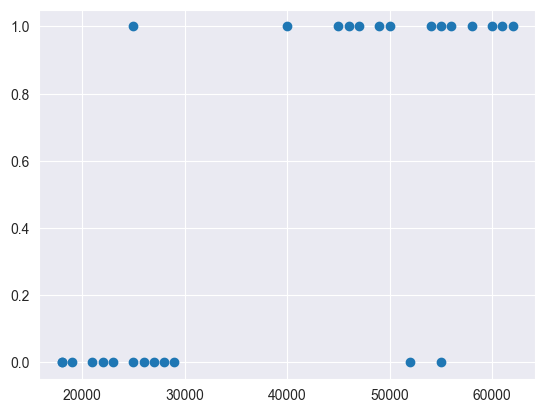

In [2]:
plt.scatter(df.monthly_salary, df.owns_car)
plt.show()

In [3]:
# Separate the features and the target variable
X = df[['monthly_salary']]
y = df['owns_car']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)


## 3. Evaluating the Model's Performance

Because we are evaluating the model on the same data it was trained on, we expect a perfect score. This highlights the risk of overfitting on small datasets.


In [8]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



### Step 2.2: Generating the Confusion Matrix

Using `scikit-learn`, we can easily generate the confusion matrix by comparing the true labels (`y_test`) with the model's predictions (`y_pred`).


In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[5, 0],
       [1, 3]], dtype=int64)

## 3. Interpreting the Results

### Step 3.1: Visualizing with a Heatmap

The raw array is useful, but a heatmap is a more intuitive way to view the results. We use the `seaborn` library to plot the matrix.


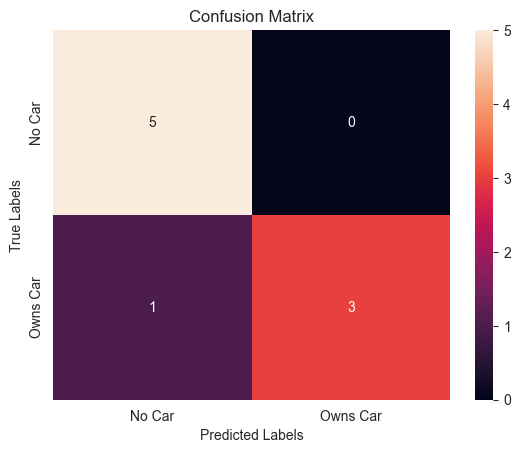

In [10]:
import seaborn as sns

classes = ["No Car", "Owns Car"]

sns.heatmap(cm, annot=True, xticklabels=classes, yticklabels=classes)   
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Step 3.2: Breaking Down the Numbers

By looking at the heatmap, we can easily interpret our model's performance on the 9 test samples:
* **True Negatives (Top-Left) = 5:** The model correctly predicted "No Car" 5 times.
* **False Positives (Top-Right) = 0:** The model never incorrectly predicted "Owns Car".
* **False Negatives (Bottom-Left) = 1:** The model incorrectly predicted "No Car" 1 time when the person actually did own a car. **This is our model's only error.**
* **True Positives (Bottom-Right) = 3:** The model correctly predicted "Owns Car" 3 times.

## 4. How the Confusion Matrix Powers Other Metrics

All the other classification metrics we've seen are calculated directly from these four values (TP=3, TN=5, FP=0, FN=1).

* **Accuracy:** $$ \frac{TP + TN}{Total} = \frac{3 + 5}{9} = 0.889 $$
* **Precision (for "Owns Car"):** $$ \frac{TP}{TP + FP} = \frac{3}{3 + 0} = 1.0 $$
* **Recall (for "Owns Car"):** $$ \frac{TP}{TP + FN} = \frac{3}{3 + 1} = 0.75 $$

This confirms the values we saw in the `classification_report`. The confusion matrix provides the complete picture, allowing for a much deeper analysis of model performance than a single accuracy score ever could.